In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


Домашнее задание к лекции «Корреляция и корреляционный анализ»
Возьмите датасет Mortality and Water Hardness

В этом датасете содержатся данные по средней годовой смертности на 100000 населения и концентрации кальция в питьевой воде для 61 большого города в Англии и Уэльсе. Города дополнительно поделены на северные и южные.

Задание 1.
Ответить на вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью?

Построить точечный график

Рассчитать коэффициенты корреляции Пирсона и Спирмена

Построить модель линейной регрессии

Рассчитать коэффициент детерминации

Вывести график остатков

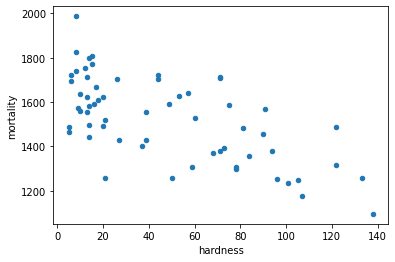

In [ ]:
df = pd.read_csv('/water.csv')
# df.head()
df.plot(kind = 'scatter', x = 'hardness', y = 'mortality');

In [ ]:
# коэффициент корреляции Пирсона
df[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [ ]:
# коэффициент корреляции Спирмена
df[['hardness', 'mortality']].corr(method = 'spearman')
# коэф Пирсона и Спирмена = -0.6, что указывает на обратную корреляцию

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


In [ ]:
# коэф кор. Кендела
df[['hardness', 'mortality']].corr(method = 'kendall')

,hardness,mortality
hardness,1.000000,-0.453753
mortality,-0.453753,1.000000


In [ ]:
X = df[['hardness']]
Y = df[['mortality']]
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.30, random_state = 23)

In [ ]:
model = LinearRegression()
model.fit(X_train, Y_train)
model.coef_
# model.intercept_

array([[-2.97603607]])

In [ ]:
model.intercept_
# y = 2.97*x - 1663.6

array([1663.60182892])

In [ ]:
y_pred = model.predict(X_test)
# y_pred

In [ ]:
Y_test

,mortality
4,1609
8,1637
56,1527
16,1555
57,1627
36,1724
29,1828
18,1318
24,1569
30,1704


In [ ]:
# коэф детерминации
model.score(X_test,Y_test)

0.5577032712365182

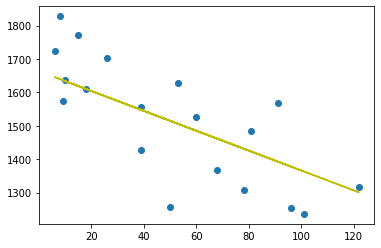

In [ ]:
plt.scatter(X_test, Y_test)
plt.plot(X_test, y_pred, c='Y');

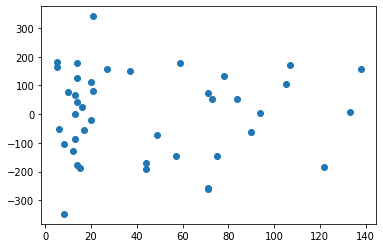

In [ ]:
# графики остатков
y_pred_train = model.predict(X_train)
Y_remains = y_pred_train - Y_train
plt.scatter(X_train,Y_remains['mortality']);
# точечный

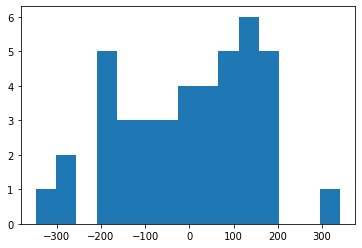

In [ ]:
plt.hist(Y_remains['mortality'], bins=15);
# гистограмма остатков

In [ ]:
Y_remains

,mortality
55,-20.918892
3,-178.062676
50,-260.696732
10,54.351196
44,-73.223938
51,67.913360
35,156.248855
7,132.471016
22,-102.206460
34,8.789032


Задание 2.
Ответить на вопрос: сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

Разделить данные на 2 группы
Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

In [ ]:
# df.head()
df_south = df[df['location'] == 'South']
df_north = df[df['location'] == 'North']
# df.head()

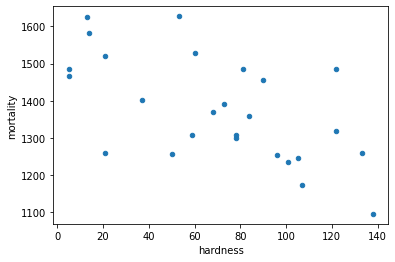

In [ ]:
df_south.plot(kind = 'scatter', x = 'hardness', y = 'mortality');

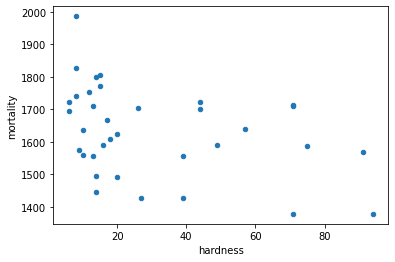

In [ ]:
df_north.plot(kind = 'scatter', x = 'hardness', y = 'mortality');

In [ ]:
# коэффициент корреляции Пирсона
print('Для Юга:')
print(df_south[['hardness', 'mortality']].corr())
print('Для Севера:')
print(df_north[['hardness', 'mortality']].corr())
#

Для Юга:
           hardness  mortality
hardness   1.000000  -0.602153
mortality -0.602153   1.000000
Для Севера:
           hardness  mortality
hardness   1.000000  -0.368598
mortality -0.368598   1.000000


In [ ]:
# коэффициент корреляции Спирмена
print('Для Юга:')
print(df_south[['hardness', 'mortality']].corr(method = 'spearman'))
print('Для Севера:')
print(df_north[['hardness', 'mortality']].corr(method = 'spearman'))

# Если по южной части измений практически не видно, то по северной - коэф изменился более значительно до 0.4, 
# тоже видно и по точкам - массив точек стал более пологим

Для Юга:
           hardness  mortality
hardness   1.000000  -0.595723
mortality -0.595723   1.000000
Для Севера:
           hardness  mortality
hardness   1.000000  -0.404208
mortality -0.404208   1.000000


In [ ]:
# коэф кор. Кендела
print('Для Юга:')
print(df_south[['hardness', 'mortality']].corr(method = 'kendall'))
print('Для Севера:')
print(df_north[['hardness', 'mortality']].corr(method = 'kendall'))
# На последнем коэф, заметнее ещё сильнее


Для Юга:
           hardness  mortality
hardness   1.000000  -0.440315
mortality -0.440315   1.000000
Для Севера:
           hardness  mortality
hardness   1.000000  -0.283058
mortality -0.283058   1.000000


**Для ЮГА**

In [ ]:
X = df_south[['hardness']]
Y = df_south[['mortality']]
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.30, random_state = 23)
model = LinearRegression()
model.fit(X_train, Y_train)
print(f'коэф лин. регрессии({model.coef_}и {model.intercept_})')
# коэф детерминации
y_pred = model.predict(X_test)
print(f'коэф. детерминации: {model.score(X_test,Y_test)}')



коэф лин. регрессии([[-1.88887324]]и [1490.41866215])
коэф. детерминации: 0.40864442581943883


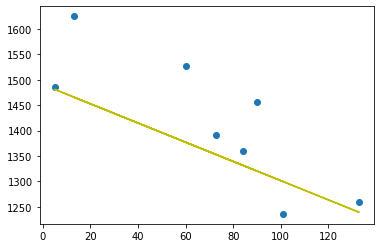

In [ ]:
plt.scatter(X_test, Y_test)
plt.plot(X_test, y_pred, c='Y');

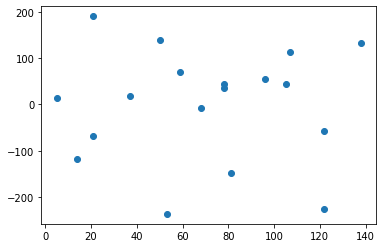

In [ ]:
# графики остатков
y_pred_train = model.predict(X_train)
Y_remains = y_pred_train - Y_train
plt.scatter(X_train,Y_remains['mortality']);
# точечный

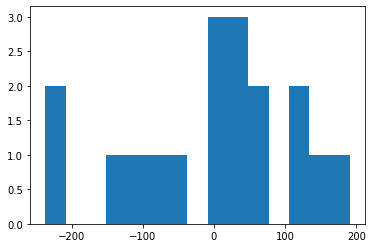

In [ ]:
plt.hist(Y_remains['mortality'], bins=15);
# гистограмма остатков

**Для Севера**

In [ ]:
X = df_north[['hardness']]
Y = df_north[['mortality']]
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.30, random_state = 23)
model = LinearRegression()
model.fit(X_train, Y_train)
print(f'коэф лин. регрессии({model.coef_}и {model.intercept_})')
# коэф детерминации
y_pred = model.predict(X_test)
print(f'коэф. детерминации: {model.score(X_test,Y_test)}')


коэф лин. регрессии([[-2.80766259]]и [1718.90781563])
коэф. детерминации: -0.25019459258608356


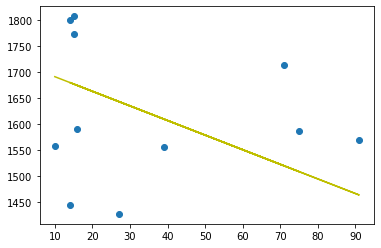

In [ ]:
plt.scatter(X_test, Y_test)
plt.plot(X_test, y_pred, c='Y');

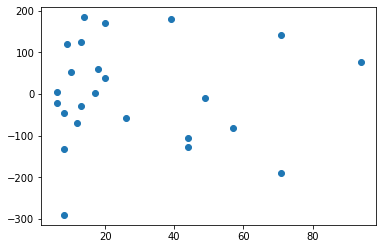

In [ ]:
# графики остатков
y_pred_train = model.predict(X_train)
Y_remains = y_pred_train - Y_train
plt.scatter(X_train,Y_remains['mortality']);
# точечный

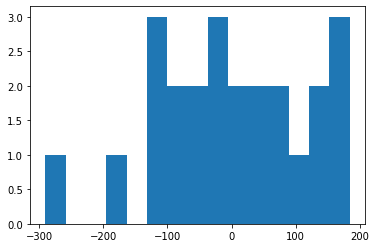

In [ ]:
plt.hist(Y_remains['mortality'], bins=15);
# гистограмма остатков

________________________________________
________________________________________



**ВыВод**


*ч.1*

Коэф. корреляции =0.6
Это говорит о том, что какая-то связь между двумя показателями есть.

*ч.2*

Видно, что данные с Юга подтверждают эту Гипотезу.
Однакто Данные с Севера показывают меньшую зависимость показателей, что позволяет утверждать, что зависимость, если и есть то не сильная. Вероятно смертность зависит от вклада других параметров, не рассматриваемых, в контексте данной работы.